In [17]:
import pandas as pd
import numpy as np
import seaborn as sb

In [29]:
movies=pd.read_csv("movies.csv")

In [33]:
movies.shape

(9742, 3)

In [35]:
rating=pd.read_csv('ratings.csv')

In [41]:
rating.shape

(100836, 4)

In [43]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [47]:
unique=rating.userId.unique()

In [49]:
unique

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [51]:
rating.userId.value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

In [55]:
rating= rating.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged = pd.merge(movies, rating_counts, on='movieId', how='inner')
rated_movie = merged_df.loc[merged_df['rating_count'].idxmax()]
print(f"Title: {rated_movie['title']}")
print(f"Movie ID: {rated_movie['movieId']}")
print(f"Number of Ratings: {rated_movie['rating_count']}")

Title: Forrest Gump (1994)
Movie ID: 356
Number of Ratings: 329


In [85]:
movie= movies[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values
if len(movie) > 0:
    movie = movie[0]
    movie_ratings = rating[rating['movieId'] == movie]
    average_rating = movie_ratings['rating'].mean()
    print(average_rating)

224.0


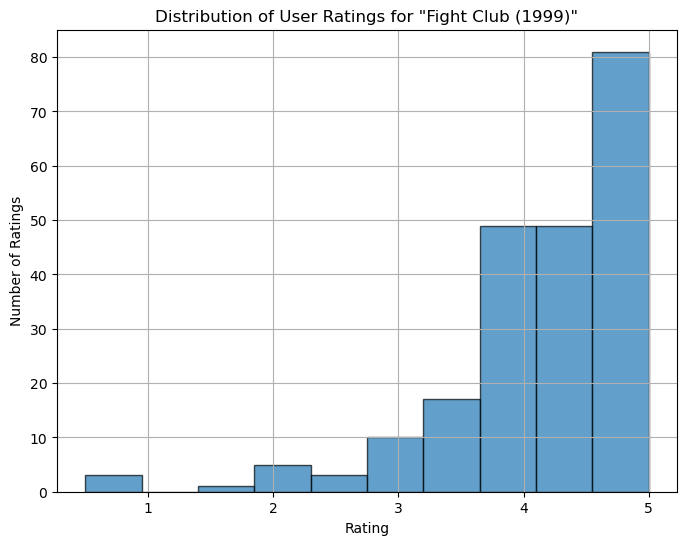

In [112]:
import matplotlib.pyplot as plt
fight_club_movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

In [114]:
aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
print(aggregation_results.head())

         rating_count  average_rating
movieId                              
1                 215        3.920930
2                 110        3.431818
3                  52        3.259615
4                   7        2.357143
5                  49        3.071429


In [118]:
movie = pd.read_csv('movies.csv') 
rating= pd.read_csv('ratings.csv')  
aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
merged_df = pd.merge(movie, aggregation_results, on='movieId', how='inner')
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
3                         Comedy|Drama|Romance             7        2.357143  
4                                       Comedy            49        3.071429  


In [120]:

aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
merged = pd.merge(movie, aggregation_results, on='movieId', how='inner')
filtered = merged_df[merged['rating_count'] > 50]
print(filtered.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
5                        Action|Crime|Thriller           102        3.946078  
6                               Comedy|Romance            54        3.185185  


In [132]:
aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
merged = pd.merge(movies_df, aggregation_results, on='movieId', how='inner')
filtered = merged_df[merged['rating_count'] > 50]
most_popular_movie = filtered.loc[filtered_df['average_rating'].idxmax()]
print(f"Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)


KeyError: 'average_rating'

In [126]:

rating_counts = rating.groupby('movieId')['rating'].count()
rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['movieId', 'rating_count']
top_movies_df = pd.merge(movies_df, rating_counts_df, on='movieId', how='inner')
top_5_movies = top_movies_df.sort_values(by='rating_count', ascending=False).head(5)
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [128]:
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[0] 
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['rating_count']}")

Third most popular Sci-Fi movie based on the number of user ratings:
Title: Matrix, The (1999)
Number of Ratings: 278


In [130]:
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['rating_count']}")

Third most popular Sci-Fi movie based on the number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238
